In [1]:
# Importing necessary library
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import warnings as warnings  
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = "C:/Users/danus/OneDrive/Desktop/dirty_cafe_sales.csv"
dirty_cafe_sales = pd.read_csv(file_path)

In [3]:
# Displaying the first few rows
display(dirty_cafe_sales.head())

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [4]:
# Displaying dataset info
dirty_cafe_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [5]:
# Checking for missing values
print("Missing Values per Column:")
print(dirty_cafe_sales.isnull().sum())

Missing Values per Column:
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [6]:
# Describing the dataset (including non-numeric columns)
display(dirty_cafe_sales.describe(include='all'))

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [7]:
# Display the shape of the dataset
print("Dataset Shape:", dirty_cafe_sales.shape)

Dataset Shape: (10000, 8)


In [8]:
# Analyzing each unique values present in each column
for column in dirty_cafe_sales.columns:
    print(f"\nUnique values in '{column}':")
    print(dirty_cafe_sales[column].unique())


Unique values in 'Transaction ID':
['TXN_1961373' 'TXN_4977031' 'TXN_4271903' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']

Unique values in 'Item':
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']

Unique values in 'Quantity':
['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]

Unique values in 'Price Per Unit':
['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']

Unique values in 'Total Spent':
['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']

Unique values in 'Payment Method':
['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]

Unique values in 'Location':
['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']

Unique values in 'Transaction Date':
['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-07' 'ERROR' '2023-05-03' '2023-06-01' '2023-03-21' '2023-11-15'

In [9]:
# Count and print the frequency of values for categorical columns
categorical_columns = ['Item', 'Payment Method', 'Location']
for column in categorical_columns:
    print(f"\nValue counts for '{column}':")
    print(dirty_cafe_sales[column].value_counts(dropna=False))


Value counts for 'Item':
Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
NaN          333
ERROR        292
Name: count, dtype: int64

Value counts for 'Payment Method':
Payment Method
NaN               2579
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

Value counts for 'Location':
Location
NaN         3265
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64


In [10]:
# Checking the data type consistency for numeric columns
numeric_columns = ['Quantity', 'Price Per Unit', 'Total Spent']
for column in numeric_columns:
    print(f"\nNon-numeric values in '{column}':")
    print(dirty_cafe_sales[pd.to_numeric(dirty_cafe_sales[column], errors='coerce').isnull()][column].unique())


Non-numeric values in 'Quantity':
['ERROR' 'UNKNOWN' nan]

Non-numeric values in 'Price Per Unit':
[nan 'ERROR' 'UNKNOWN']

Non-numeric values in 'Total Spent':
['ERROR' nan 'UNKNOWN']


In [11]:
# Convert numeric columns to appropriate types
def convert_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

convert_to_numeric(dirty_cafe_sales, numeric_columns)

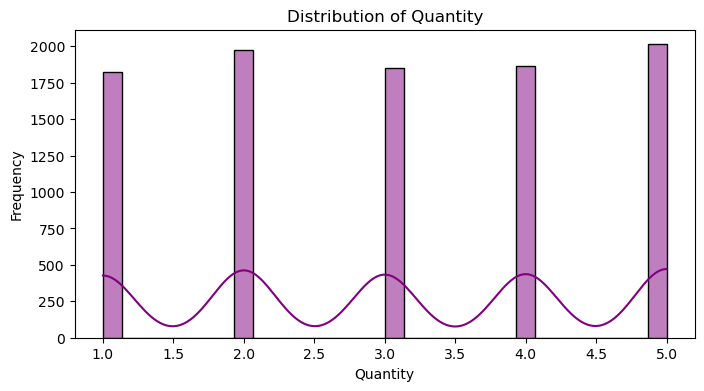

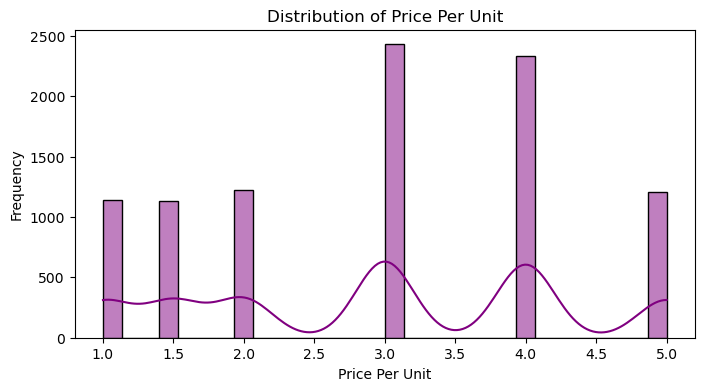

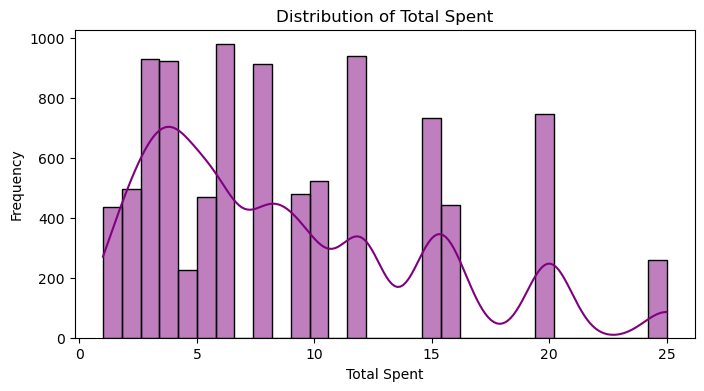

In [13]:
# Plot distribution of numeric columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(dirty_cafe_sales[column], kde=True, bins=30, color='purple')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

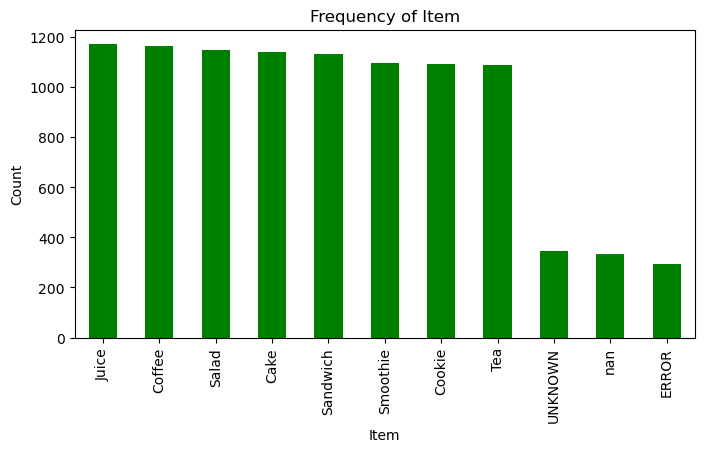

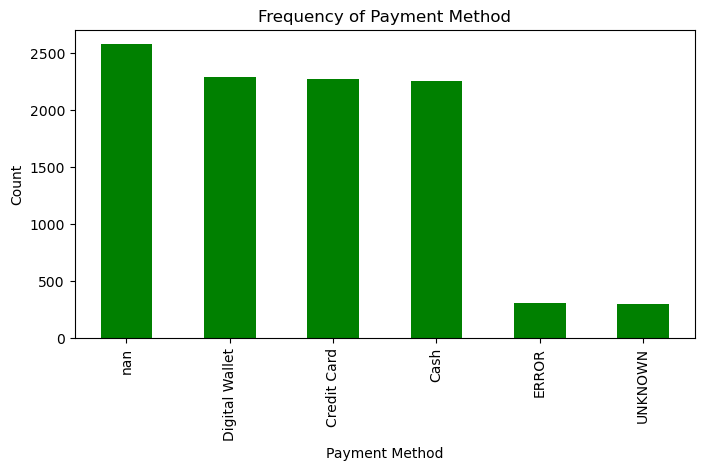

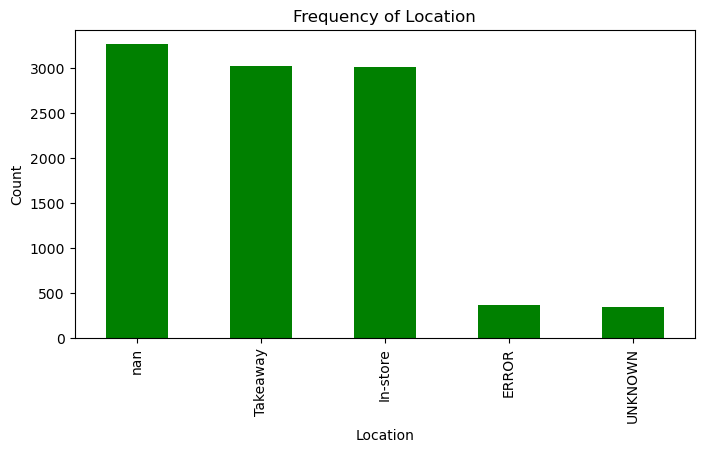

In [14]:
# Bar plot for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    dirty_cafe_sales[column].value_counts(dropna=False).plot(kind='bar', color='Green')
    plt.title(f"Frequency of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

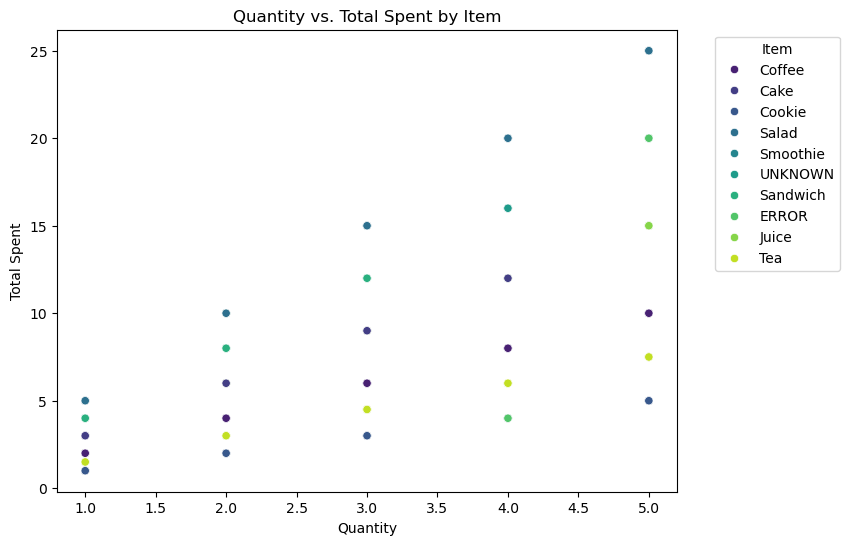

In [15]:
# Scatter plot to analyze relationships between numeric columns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dirty_cafe_sales, x='Quantity', y='Total Spent', hue='Item', palette='viridis')
plt.title("Quantity vs. Total Spent by Item")
plt.xlabel("Quantity")
plt.ylabel("Total Spent")
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

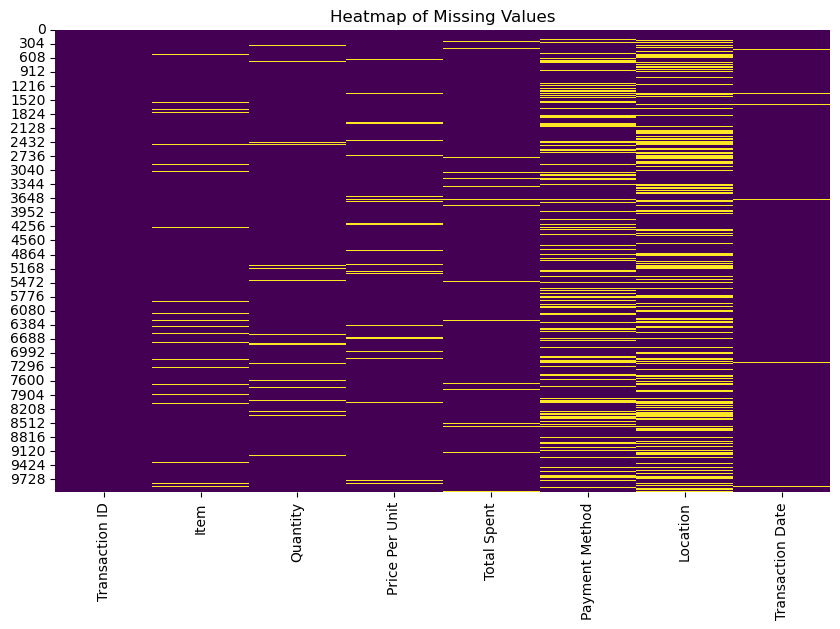

In [16]:
# Heatmap of missing data
plt.figure(figsize=(10, 6))
sns.heatmap(dirty_cafe_sales.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

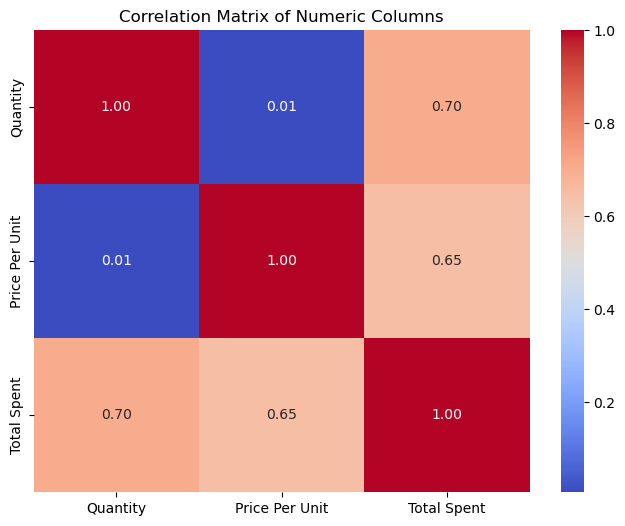

In [17]:
# Correlation matrix for numeric columns
plt.figure(figsize=(8, 6))
corr_matrix = dirty_cafe_sales[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

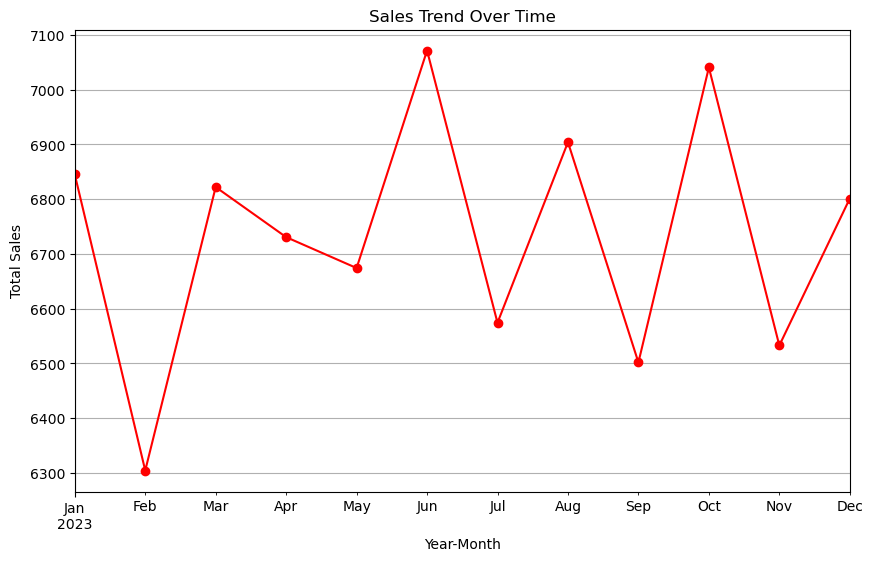

In [18]:
# Time-based analysis
if 'Transaction Date' in dirty_cafe_sales.columns:
    dirty_cafe_sales['Transaction Date'] = pd.to_datetime(dirty_cafe_sales['Transaction Date'], errors='coerce')
    dirty_cafe_sales['YearMonth'] = dirty_cafe_sales['Transaction Date'].dt.to_period('M')
    
    # Line plot for sales trend over time
    sales_trend = dirty_cafe_sales.groupby('YearMonth')['Total Spent'].sum()
    plt.figure(figsize=(10, 6))
    sales_trend.plot(kind='line', marker='o', color='red')
    plt.title("Sales Trend Over Time")
    plt.xlabel("Year-Month")
    plt.ylabel("Total Sales")
    plt.grid()
    plt.show()